## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("/content/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN","NAME"],inplace=True)

In [3]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_vc=application_df.APPLICATION_TYPE.value_counts() 
application_vc

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

application_types_to_replace = application_vc[application_vc<520].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
CLASSIFICATION_binning=application_df.CLASSIFICATION.value_counts() 
CLASSIFICATION_binning

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

(0.0, 3000.0)

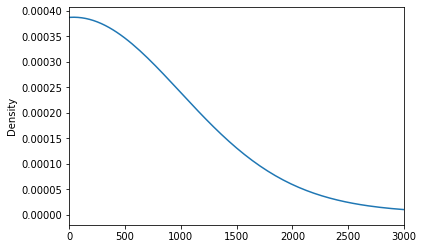

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
import matplotlib.pyplot as plt
CLASSIFICATION_binning.plot.density()
plt.xlim(left=0,right=3000)
# by 1000 there is steep decline

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = CLASSIFICATION_binning[CLASSIFICATION_binning<1000].index

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
app_dummies=pd.get_dummies(application_df)

In [11]:
# Split our preprocessed data into our features and target arrays
X=app_dummies.drop(columns="IS_SUCCESSFUL")
y=app_dummies.IS_SUCCESSFUL
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# first , Second & Output layer

nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim=len(X_train_scaled [0])))
nn.add(tf.keras.layers.Dense(units=100, activation="relu"))
nn.add(tf.keras.layers.Dense(units=100, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))



# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4400      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 24,701
Trainable params: 24,701
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 3s 2ms/step - loss: 0.5695 - accuracy: 0.7227
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5552 - accuracy: 0.7312
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5527 - accuracy: 0.7312
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5509 - accuracy: 0.7311
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5498 - accuracy: 0.7330
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5485 - accuracy: 0.7353
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5484 - accuracy: 0.7345
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5471 - accuracy: 0.7356
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5463 - accuracy: 0.7356
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5462 - accuracy: 0.7358

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5571 - accuracy: 0.7258 - 481ms/epoch - 2ms/step
Loss: 0.5571498274803162, Accuracy: 0.7258309125900269


In [17]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharityv2.h5")

In [18]:
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim=len(X_train_scaled [0])))
nn.add(tf.keras.layers.Dense(units=100, activation="relu"))
nn.add(tf.keras.layers.Dropout(.2))
nn.add(tf.keras.layers.Dense(units=100, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [19]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 6s 4ms/step - loss: 0.5732 - accuracy: 0.7237
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5587 - accuracy: 0.7290
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5551 - accuracy: 0.7296
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5527 - accuracy: 0.7322
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5525 - accuracy: 0.7326
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5513 - accuracy: 0.7345
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5503 - accuracy: 0.7347
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5497 - accuracy: 0.7339
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5488 - accuracy: 0.7335
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5474 - accuracy: 0.7351

In [21]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5514 - accuracy: 0.7268 - 1s/epoch - 4ms/step
Loss: 0.5514324307441711, Accuracy: 0.7267638444900513


In [22]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharityv3.h5")

In [23]:
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=100, activation="sigmoid", input_dim=len(X_train_scaled [0])))
nn.add(tf.keras.layers.Dense(units=100, activation="sigmoid"))
nn.add(tf.keras.layers.Dense(units=100, activation="sigmoid"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [25]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 3s 2ms/step - loss: 0.5981 - accuracy: 0.6974
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5731 - accuracy: 0.7236
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5670 - accuracy: 0.7264
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5607 - accuracy: 0.7289
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5583 - accuracy: 0.7287
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5560 - accuracy: 0.7303
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5548 - accuracy: 0.7305
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5544 - accuracy: 0.7309
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5533 - accuracy: 0.7311
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5528 - accuracy: 0.7307

In [27]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5520 - accuracy: 0.7266 - 840ms/epoch - 3ms/step
Loss: 0.5520039200782776, Accuracy: 0.7266472578048706


In [28]:
nn.save("AlphabetSoupCharityv4.h5")